In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [3]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [4]:
# Create a tensor
array_5d = 5*np.ones(720).reshape((2, 3, 4, 5, 6))

# Create tensor
tensor_5d = Tensor(array_5d)

# Result preview
print(tensor_5d)
tensor_5d.data

This tensor is of order 5 and consists of 720 elements.
Sizes and names of its modes are (2, 3, 4, 5, 6) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


array([[[[[5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.]],

         [[5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.]],

         [[5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.]],

         [[5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.]]],


        [[[5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.]],

         [[5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5.],
          [5., 5

In [5]:
# Calculate Frobenious norm
FrobeniousNorm = tensor_5d.frob_norm
print(FrobeniousNorm)

tensor_5d.size

134.16407864998737


720

### Solution: Part 2

In [6]:
# Initialise vector for storing number of elements
num_elements =[]
tensor_list=[]
# Dimension size
dim_size = 2
# Re-shape input
reshape_input = (dim_size,dim_size)
# Re-shape input increasing dimension
reshape_addition = (dim_size,)
# Tensor orders
orders = range(3, 21)
# Create tensors and collect information
for index in orders:
    reshape_input+=reshape_addition
    array = np.ones(dim_size**index).reshape(reshape_input)
    tensor = Tensor(array)
    tensor_list.append(tensor)
    num_elements.append(tensor.size)
# Instance of order 4
print(tensor_list[1])
tensor_list[1].data

This tensor is of order 4 and consists of 16 elements.
Sizes and names of its modes are (2, 2, 2, 2) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


array([[[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]],


       [[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]]])

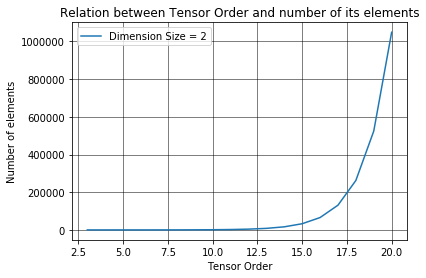

In [7]:
# Plot results
plt.plot(orders,num_elements)
plt.xlabel('Tensor Order')
plt.ylabel('Number of elements')
plt.legend(['Dimension Size = '+ str(dim_size)])
plt.title('Relation between Tensor Order and number of its elements')
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.show()

### Solution: Part 3

In [8]:
# Create tensors and collect information
# Initialise vector for storing number of elements
num_elements2=[]
tensor_list2=[]
# Dimension sizes
dim_size = range(3, 16)
# Tensor order
order = 3
# Create tensors and collect information
for index in dim_size:
    array = np.ones(index**order).reshape(index,index,index)
    tensor = Tensor(array)
    tensor_list2.append(tensor)
    num_elements2.append(tensor.size)
# Instance of dimesion 4
print(tensor_list2[1])
tensor_list2[1].data

This tensor is of order 3 and consists of 64 elements.
Sizes and names of its modes are (4, 4, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

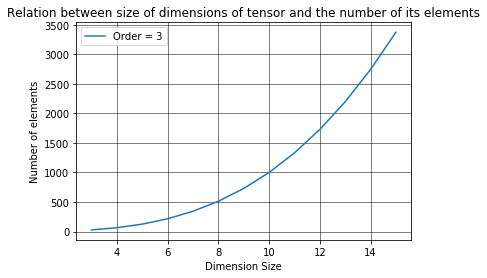

In [9]:
# Plot results
plt.plot(dim_size,num_elements2)
plt.xlabel('Dimension Size')
plt.ylabel('Number of elements')
plt.legend(['Order = '+ str(order)])
plt.title('Relation between size of dimensions of tensor and the number of its elements')
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.show()

### Solution: Part 4

By analysing the two plot obtained from part 2, where we vary tensor order (M) and keeping dimension size constant to a value of 2, we can identify that this is an exponential curve where number of elements $N=2^{M}$. On the other hand, in part 4 we vary size of each dimension (D) while keeping tensor order constant to a value of 3, and the generated plot is a cubic curve where number of elements $N=D^{3}$. In general, for a tensor with equally-sized dimensions, then the total number of elements $N=D^{M}$. By keeping $D$ fixed, we obtain an exponential increase in N and by keeping $M$ fixed, we obtain a polynomial (by power of $M$) increase in N of order M. 

The number of elements of tensor is proportional to the required memory for tensor storage and also proportional to the computational complexity for operations done on tensors, therefore the lower the number of elements the better. By analysing further the given data, the number of elements when tensor order varies from 3 to 9 is lower than that when size of dimension varies from 3 to 9 thus increasing dimension size in this range has a much higher effect in the number of elements than increasing tensor order. However, after a x-value of 9 on both curves, the exponential curve obtains a higher number of elements N compared to the cubic curve (after this x-value of 9 exponential increases more rapidly than the cubic), thus increasing tensor order in this range has a higher effect in the number of elements than increasing dimension size.

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [10]:
# Mode-2 fiber
tensor.data[0,1,:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
# Frontal slice
tensor.data[0,:,:]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [12]:
# Create a tensor of order 4
array_4d = np.arange(81).reshape((3, 3, 3, 3))
tensor_4d = Tensor(array_4d)

In [13]:
# Display horizontal slices (mode-[2,3])- According to definition given in the image 
for i in range(0,3):
    for j in range(0,3):
        print(tensor_4d.data[i,:,:,j])

[[ 0  3  6]
 [ 9 12 15]
 [18 21 24]]
[[ 1  4  7]
 [10 13 16]
 [19 22 25]]
[[ 2  5  8]
 [11 14 17]
 [20 23 26]]
[[27 30 33]
 [36 39 42]
 [45 48 51]]
[[28 31 34]
 [37 40 43]
 [46 49 52]]
[[29 32 35]
 [38 41 44]
 [47 50 53]]
[[54 57 60]
 [63 66 69]
 [72 75 78]]
[[55 58 61]
 [64 67 70]
 [73 76 79]]
[[56 59 62]
 [65 68 71]
 [74 77 80]]


In [14]:
# Display fibers - any five row fibers
print(tensor_4d.data[0,:,0,0])
print(tensor_4d.data[0,:,1,1])
print(tensor_4d.data[0,:,2,2])
print(tensor_4d.data[1,:,1,1])
print(tensor_4d.data[1,:,2,2])

[ 0  9 18]
[ 4 13 22]
[ 8 17 26]
[31 40 49]
[35 44 53]


### Solution: Part 2

In [15]:
# Create a tensor of order 3
# Create a tensor of order 3 and shape (4,2,5), where the values of each consequent frontal slice are doubled
array_4d = np.ones(40,dtype=int).reshape((4, 2, 5))
tensor_4d = Tensor(array_4d)
# Itetare over all frontal slices -1 
factor = 2 
for i in range(4):
    tensor_4d.data[:,:,i+1]= tensor_4d.data[:,:,i]*factor
print(tensor_4d.data)

[[[ 1  2  4  8 16]
  [ 1  2  4  8 16]]

 [[ 1  2  4  8 16]
  [ 1  2  4  8 16]]

 [[ 1  2  4  8 16]
  [ 1  2  4  8 16]]

 [[ 1  2  4  8 16]
  [ 1  2  4  8 16]]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [16]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)
print(tensor.data)

# Unfolding of a tensor
# Mode starts from 0 in python
tensor.unfold(mode=2)

# Result preview
print(tensor)
tensor.data

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (4, 6) and ['mode-2', 'mode-0_mode-1'] respectively.


array([[ 0,  4,  8, 12, 16, 20],
       [ 1,  5,  9, 13, 17, 21],
       [ 2,  6, 10, 14, 18, 22],
       [ 3,  7, 11, 15, 19, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [17]:
# Create a tensor
# Create 4-d array of data
array_4d = np.arange(360).reshape((2, 5, 4, 9))

# Create tensor
tensor = Tensor(array_4d)
print(tensor.data)

[[[[  0   1   2   3   4   5   6   7   8]
   [  9  10  11  12  13  14  15  16  17]
   [ 18  19  20  21  22  23  24  25  26]
   [ 27  28  29  30  31  32  33  34  35]]

  [[ 36  37  38  39  40  41  42  43  44]
   [ 45  46  47  48  49  50  51  52  53]
   [ 54  55  56  57  58  59  60  61  62]
   [ 63  64  65  66  67  68  69  70  71]]

  [[ 72  73  74  75  76  77  78  79  80]
   [ 81  82  83  84  85  86  87  88  89]
   [ 90  91  92  93  94  95  96  97  98]
   [ 99 100 101 102 103 104 105 106 107]]

  [[108 109 110 111 112 113 114 115 116]
   [117 118 119 120 121 122 123 124 125]
   [126 127 128 129 130 131 132 133 134]
   [135 136 137 138 139 140 141 142 143]]

  [[144 145 146 147 148 149 150 151 152]
   [153 154 155 156 157 158 159 160 161]
   [162 163 164 165 166 167 168 169 170]
   [171 172 173 174 175 176 177 178 179]]]


 [[[180 181 182 183 184 185 186 187 188]
   [189 190 191 192 193 194 195 196 197]
   [198 199 200 201 202 203 204 205 206]
   [207 208 209 210 211 212 213 214 215]]

  

In [18]:
# Display unfolded version
# Mode starts from 0 in python
tensor.unfold(mode=1)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
        196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
        209, 210, 211, 212, 213, 214, 215],
       [ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  71, 216, 217, 218,
        219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
        232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
        245, 246, 247, 248, 249, 250, 251],
       [ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [20]:
# Create original tensor 
I, J, K = 4, 4, 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

In [21]:
# Create matrix
J_new = 5
A = np.arange(J_new * J).reshape(J_new, J)

In [22]:
# Perform mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (4, 5, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[  70,   76,   82,   88,   94,  190,  196,  202,  208,  214,  310,
         316,  322,  328,  334,  430,  436,  442,  448,  454],
       [ 190,  212,  234,  256,  278,  630,  652,  674,  696,  718, 1070,
        1092, 1114, 1136, 1158, 1510, 1532, 1554, 1576, 1598],
       [ 310,  348,  386,  424,  462, 1070, 1108, 1146, 1184, 1222, 1830,
        1868, 1906, 1944, 1982, 2590, 2628, 2666, 2704, 2742],
       [ 430,  484,  538,  592,  646, 1510, 1564, 1618, 1672, 1726, 2590,
        2644, 2698, 2752, 2806, 3670, 3724, 3778, 3832, 3886],
       [ 550,  620,  690,  760,  830, 1950, 2020, 2090, 2160, 2230, 3350,
        3420, 3490, 3560, 3630, 4750, 4820, 4890, 4960, 5030]])

In [23]:
# Validate equivalence between the left and right hand side of 𝐘(𝑛)=𝐀𝐗(𝑛)
# LHS - mode 2 unfolding of Y
LHS = Y.unfold(mode=1, inplace=False).data
# RHS - A * mode 2 unfolding of tensor X
RHS = np.matmul(A, X.unfold(mode=1, inplace=False).data)
# Check if LHS=RHS - i.e. check if the two arrays are equal
check = np.array_equal(LHS,RHS)
print(check)

True


# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [24]:
# Create tensor
I, J, K = 3, 4, 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

In [25]:
# Create matrices
J_A = 5
J_B = 4
# Matrix A
A = np.arange(J_A * J).reshape(J_A, J)
# Matrix B
B = np.arange(J_B * K).reshape(J_B, K)

In [26]:
# Validate property 1 (modes are not the same) - 𝐗 ×𝑛 𝐀 ×𝑚 𝐁 = 𝐗 ×𝑚 𝐁 ×𝑛 𝐀
# Considering LHS 
LHS = X.mode_n_product(A, mode=1, inplace=False).mode_n_product(B, mode=2, inplace=False)
# Considering RHS 
RHS = X.mode_n_product(B, mode=2, inplace=False).mode_n_product(A, mode=1, inplace=False)

# Check if LHS=RHS - i.e. check if the two arrays are equal
check = np.array_equal(LHS,RHS)
print(check)

True


In [27]:
# Validate property 2 (modes are the same) - 𝐗 ×𝑛 𝐀 ×𝑛 𝐁 = 𝐗 ×𝑛 (𝐁𝐀)
# Considering LHS 
LHS = X.mode_n_product(A, mode=1, inplace=False).mode_n_product(B, mode=1, inplace=False)
# Considering RHS 
RHS = X.mode_n_product(np.matmul(B, A), mode=1, inplace=False)

# Check if LHS=RHS - i.e. check if the two arrays are equal
check = np.array_equal(LHS,RHS)
print(check)

True


### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [28]:
%%latex
We can denote an $N^{th}$ order tensor $\mathbf{X}$ as $\mathbf{X} \in \mathbb{R}^{I_{1}\times I_{2}\times \dots \times I_{N} }$ where 
tensor $\mathbf{X}$ has $N$ indices denoted by $\{i_{1}, i_{2}, \dots , i_{N} \}$. Therefore using this notation we can denote each 
element of tensor  $\mathbf{X}$ as $\mathbf{X}(i_{1}, i_{2}, \dots , i_{N})$. When considering a mode-n product between tensor $\mathbf{X}$
and a matrix  $\mathbf{A} \in \mathbb{R}^{J_{n}\times I_{n}}$, then we know that the output tensor 
$\mathbf{\hat{X}} = \mathbf{X} \times_{n}  \mathbf{A} \in \mathbb{R}^{I_{1}\times \dots \times I_{n-1} \times J_{n}  \times I_{n+1} \times \dots \times I_{N}}$.
This effectively means that the each element of $\mathbf{\hat{X}}$ is equal to the sum of products of the corresponding elements of $\mathbf{X}$
and $\mathbf{A}$
\begin{equation}
    \mathbf{\hat{X}}(i_{1}, \dots , i_{n-1} , j_{n}  , i_{n+1} , \dots , i_{N}) = \sum_{i_{n}=1}^{I_{n}} \mathbf{X}(i_{1}, i_{2}, \dots, i_{n}, \dots , i_{N}) 
    \cdot \mathbf{A}(j_{n},i_{n}) \ \ \ \ \ \ \ \ \ (1)
\end{equation}
We can utilise this notation to prove analytically the second property of multiple mode-n products, where the modes are the same. Starting with the left-hand side (LHS) of second property and considering 
the operations in an element-wise manner as in Equation (1):
\begin{align}
    \text{LHS}_{element-wise} &= \sum_{\hat{i}_{n}=1}^{\hat{I}_{n}} \left( \sum_{i_{n}=1}^{I_{n}} \mathbf{X}(i_{1}, \dots, i_{n}, \dots , i_{N}) \mathbf{A}(\hat{i}_{n}, i_{n}) \right) \mathbf{B}(k_{n},\hat{i}_{n})
    \ \ \ \ \ \ \ \ \ (2)
\end{align}
By changing the order of summations we can further obtain:
\begin{align}
    \text{LHS}_{element-wise} &= \sum_{i_{n}=1}^{I_{n}} \mathbf{X}(i_{1}, \dots, i_{n}, \dots , i_{N}) \sum_{\hat{i}_{n}=1}^{\hat{I}_{n}} \mathbf{A}(\hat{i}_{n}, i_{n}) \mathbf{B}(k_{n},\hat{i}_{n}) =
    \sum_{i_{n}=1}^{I_{n}} \mathbf{X}(i_{1}, \dots, i_{n}, \dots , i_{N}) \sum_{\hat{i}_{n}=1}^{\hat{I}_{n}} \mathbf{B}(k_{n},\hat{i}_{n}) \mathbf{A}(\hat{i}_{n}, i_{n})  \ \ \ \ \ \ \ \ \ (3)
\end{align}
We can identify that the last summation of Equation (3) is equal to the matrix product between matrices $\mathbf{B}$ and $\mathbf{A}$,i.e. $\mathbf{C} = \mathbf{B} \mathbf{A}$, given by:
\begin{equation}
    \mathbf{C}(k_{n},i_{n}) = \sum_{\hat{i}_{n}=1}^{\hat{I}_{n}} \mathbf{B}(k_{n},\hat{i}_{n}) \mathbf{A}(\hat{i}_{n}, i_{n}) \ \ \ \ \ \ \ \ \ (4)
\end{equation}
Using this property, we can further reduce Equation (3) as:
\begin{align}
    \text{LHS}_{element-wise} &= \sum_{i_{n}=1}^{I_{n}} \mathbf{X}(i_{1}, \dots, i_{n}, \dots , i_{N}) \mathbf{C}({k}_{n}, i_{n}) =
    \mathbf{\tilde{X}}(i_{1}, \dots , i_{n-1} , k_{n}  , i_{n+1} , \dots , i_{N})\ \ \ \ \ \ \ \ \ (5)
\end{align}
Using the definition of mode-n product from Equation (1), we can write Equation (5) in tensor notation as:
\begin{align}
    \text{LHS} &= \mathbf{X} \times_{n}  \mathbf{A} \times_{n}  \mathbf{B} = \mathbf{tilde{X}} = \mathbf{X} \times_{n}  (\mathbf{C})  = \mathbf{X} \times_{n}  (\mathbf{A} \mathbf{B}) = \text{RHS} \ \ \ \ \ \ \ \ \ (6)
\end{align}
Since the right-hand side (RHS) and LHS of second property are equal, then the property is verified.





<IPython.core.display.Latex object>